## Carrier Phase Double Differences ##
---
The notebook demonstrates the evaluation of carrier phase double differences.

### Import Required Libraries ###

In [1]:
# System library
import os
import numpy as np
import pandas as pd

# Graphic library, it may requires the installation of ipympl
import matplotlib.pyplot as plt
%matplotlib widget

# Update bar
from tqdm.notebook import tqdm

# File chooser
from ipyfilechooser import FileChooser

# Custom libraries
import rinex_parser as rp

### Load and parse the first RINEX file ###

In [2]:
fc = FileChooser()
fc

FileChooser(path='/media/daniele/5C13-0007/Projects/Development/RinexTools/code', filename='', title='', show_…

In [3]:
filename = fc.selected
print(filename)

/media/daniele/5C13-0007/Projects/Development/RinexTools/rinex/WUT000POL_R_20240680000_01H_01S_MO.rnx


In [4]:
# Allocate the rinex parser
rxconv = rp.rinex_parser(filename)

# Convert the rinex file into CSV format
filecsv = filename.split("/")[-1][:-4] + '.csv'

# Output folder
csvfolder = "./csv"
if not os.path.exists(csvfolder) :
    os.mkdir(csvfolder)

filecsv = csvfolder + '/' + filecsv 

rxconv.to_csv(filecsv)

# Load the converted file as Pandas dataframe
df1 = pd.read_csv(filecsv)

  0%|          | 0/41824864 [00:00<?, ?it/s]

In [5]:
print(df1)

              TOW  WEEK GNSS  PRN OBS_TYPE         VALUE
0        432000.0  2304    C    2      C2I  4.060645e+07
1        432000.0  2304    C    2      L2I  2.114484e+08
2        432000.0  2304    C    2      D2I  1.777240e+02
3        432000.0  2304    C    2      S2I  3.187500e+01
4        432000.0  2304    C    2      C7I  4.060645e+07
...           ...   ...  ...  ...      ...           ...
2176348  435599.0  2304    G   30      S2L  3.543800e+01
2176349  435599.0  2304    G   30      C5Q  2.455130e+07
2176350  435599.0  2304    G   30      L5Q  9.634459e+07
2176351  435599.0  2304    G   30      D5Q  2.889902e+03
2176352  435599.0  2304    G   30      S5Q  3.868800e+01

[2176353 rows x 6 columns]


### Do the same for the second RINEX file ###

In [6]:
fb = FileChooser()
fb

FileChooser(path='/media/daniele/5C13-0007/Projects/Development/RinexTools/code', filename='', title='', show_…

In [7]:
filename1 = fb.selected
print(filename1)

/media/daniele/5C13-0007/Projects/Development/RinexTools/rinex/WUT100POL_R_20240680000_01H_01S_MO.rnx


In [8]:
# Allocate the rinex parser
rxconv1 = rp.rinex_parser(filename1)

# Convert the rinex file into CSV format
filecsv1 = filename1.split("/")[-1][:-4] + '.csv'

filecsv1 = csvfolder + '/' + filecsv1 

rxconv1.to_csv(filecsv1)

# Load the converted file as Pandas dataframe
df2 = pd.read_csv(filecsv1)

  0%|          | 0/41824114 [00:00<?, ?it/s]

In [9]:
print(df2)

              TOW  WEEK GNSS  PRN OBS_TYPE         VALUE
0        432000.0  2304    C    2      C2I  4.058910e+07
1        432000.0  2304    C    2      L2I  2.113581e+08
2        432000.0  2304    C    2      D2I  8.218600e+01
3        432000.0  2304    C    2      S2I  3.187500e+01
4        432000.0  2304    C    2      C7I  4.058910e+07
...           ...   ...  ...  ...      ...           ...
2170524  435599.0  2304    G   30      S2L  3.550000e+01
2170525  435599.0  2304    G   30      C5Q  2.460013e+07
2170526  435599.0  2304    G   30      L5Q  9.653619e+07
2170527  435599.0  2304    G   30      D5Q  2.817759e+03
2170528  435599.0  2304    G   30      S5Q  3.875000e+01

[2170529 rows x 6 columns]


### Clock Biases ###
**VERY IMPORTANT:** we DO NEED the clock biases associated to the two RINEX files to propagate carrier phases to the same time instant. Clock biases can be computed using standard SPP solutions. For instance, [RTKlib] (https://www.rtklib.com/) provides the clock solution within its **status file**. The related option must be enabled in **RTKPost**.

See figure below:
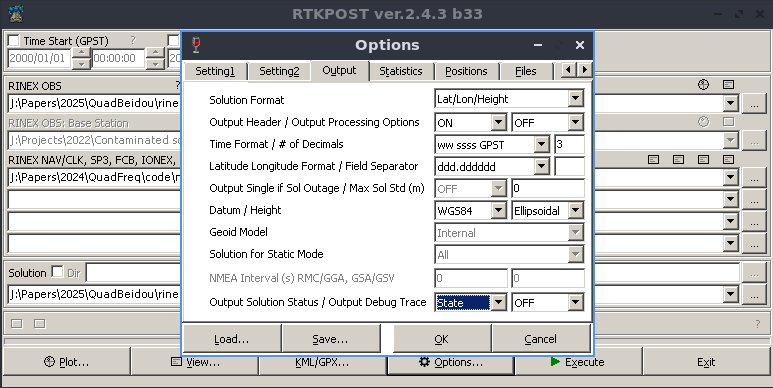

### Function to load the clock bias from an RTKlib status file ###

In [10]:
def parse_clk_from_rtkstatus(filename : str) -> pd.DataFrame :
    
    # Open the input file
    fid = open(filename, 'r')
    
    # Output dictionary
    outDict = {"WN" : [],
               "TOW" : [],
               "clk" : []
        }

    for line in fid :
        tkn = line.split(",")

        if tkn[0] == "$CLK" :
            outDict["WN"].append(int(tkn[1]))
            outDict["TOW"].append(float(tkn[2]))
            outDict["clk"].append(float(tkn[7]))

    outdf = pd.DataFrame(outDict)
    
    # Close the input file
    fid.close()
    
    return outdf

### Open and load the first clock bias ###
**Be sure to load the correct file**

In [11]:
fclk1 = FileChooser()
fclk1

FileChooser(path='/media/daniele/5C13-0007/Projects/Development/RinexTools/code', filename='', title='', show_…

In [12]:
fileclk1 = fclk1.selected
dfclk1 = parse_clk_from_rtkstatus(fileclk1)
dfclk1

,WN,TOW,clk
0,2304,432000.0,-242543.243
1,2304,432001.0,-242696.333
2,2304,432002.0,-242849.016
3,2304,432003.0,-243002.037
4,2304,432004.0,-243155.255
...,...,...,...
3595,2304,435595.0,206783.022
3596,2304,435596.0,206629.914
3597,2304,435597.0,206476.893
3598,2304,435598.0,206323.507


### Open and load the second clock bias ###
**Be sure to load the correct file**

In [13]:
fclk2 = FileChooser()
fclk2

FileChooser(path='/media/daniele/5C13-0007/Projects/Development/RinexTools/code', filename='', title='', show_…

In [14]:
fileclk2 = fclk2.selected
dfclk2 = parse_clk_from_rtkstatus(fileclk2)
dfclk2

,WN,TOW,clk
0,2304,432000.0,-300391.264
1,2304,432001.0,-300483.416
2,2304,432002.0,-300574.992
3,2304,432003.0,-300666.586
4,2304,432004.0,-300758.125
...,...,...,...
3595,2304,435595.0,369405.182
3596,2304,435596.0,369313.627
3597,2304,435597.0,369221.528
3598,2304,435598.0,369129.580


### Now compute double differences ###

In [15]:
# Check which GNSS and signals are present
print(rxconv.obs_list)

{'G': ['C1C', 'L1C', 'D1C', 'S1C', 'C1W', 'S1W', 'C2W', 'L2W', 'D2W', 'S2W', 'C2L', 'L2L', 'D2L', 'S2L', 'C5Q', 'L5Q', 'D5Q', 'S5Q', 'C1L', 'L1L', 'D1L', 'S1L'], 'E': ['C1C', 'L1C', 'D1C', 'S1C', 'C6C', 'L6C', 'D6C', 'S6C', 'C5Q', 'L5Q', 'D5Q', 'S5Q', 'C7Q', 'L7Q', 'D7Q', 'S7Q', 'C8Q', 'L8Q', 'D8Q', 'S8Q'], 'C': ['C1P', 'L1P', 'D1P', 'S1P', 'C5P', 'L5P', 'D5P', 'S5P', 'C2I', 'L2I', 'D2I', 'S2I', 'C7I', 'L7I', 'D7I', 'S7I', 'C6I', 'L6I', 'D6I', 'S6I', 'C7D', 'L7D', 'D7D', 'S7D']}


In [24]:
# Select a GNSS and a type of observations
gnss = "G"
obstype = "1C"

# Keep only the selected GNSS and measurements (carrier phase and Doppler frequencies)
df1_car = df1[(df1["GNSS"].values == gnss) & (df1["OBS_TYPE"].values == "L" + obstype)]
df1_dop = df1[(df1["GNSS"].values == gnss) & (df1["OBS_TYPE"].values == "D" + obstype)]

df2_car = df2[(df2["GNSS"].values == gnss) & (df2["OBS_TYPE"].values == "L" + obstype)]
df2_dop = df2[(df2["GNSS"].values == gnss) & (df2["OBS_TYPE"].values == "D" + obstype)]

# List of available satellites
sats = np.unique(df1_car["PRN"].values)

# Select the pivot satellite as the one with more measurements (more available)
pivsat = sats[0]
max_nobs = sum(df1_car["PRN"].values == pivsat)

for sat in sats :
    nobs = sum(df1_car["PRN"].values == sat)
    
    if nobs > max_nobs :
        pivsat = sat
        max_nobs = nobs
        
print(f"Pivot Satellite: {pivsat}")

Pivot Satellite: 3


### Compute carrier phase differences for the pivot satellite ###

In [25]:
d1_car_piv = df1_car[df1_car["PRN"].values == pivsat]
d1_dop_piv = df1_dop[df1_dop["PRN"].values == pivsat]

# Common TOWs
tow1_piv, ind1, ind2 = np.intersect1d(d1_car_piv["TOW"].values, d1_dop_piv["TOW"].values, return_indices = True)
d1_car_piv = d1_car_piv.iloc[ind1]
d1_dop_piv = d1_dop_piv.iloc[ind2]

# Also get the corresponding clock bias
tow1_piv, ind1, ind2 = np.intersect1d(d1_car_piv["TOW"].values, dfclk1["TOW"].values, return_indices = True)

# Propagate carrier phase observations using Doppler values
# The clock bias is in nano-seconds
carr1_piv = d1_car_piv.iloc[ind1]["VALUE"].values - dfclk1.iloc[ind2]["clk"].values * 1e-9 * d1_dop_piv.iloc[ind1]["VALUE"].values


In [26]:
# Now do the same for the second receiver
d2_car_piv = df2_car[df2_car["PRN"].values == pivsat]
d2_dop_piv = df2_dop[df2_dop["PRN"].values == pivsat]

# Common TOWs
tow2_piv, ind1, ind2 = np.intersect1d(d2_car_piv["TOW"].values, d2_dop_piv["TOW"].values, return_indices = True)
d2_car_piv = d2_car_piv.iloc[ind1]
d2_dop_piv = d2_dop_piv.iloc[ind2]

# Also get the corresponding clock bias
tow2_piv, ind1, ind2 = np.intersect1d(d2_car_piv["TOW"].values, dfclk2["TOW"].values, return_indices = True)

# Propagate carrier phase observations using Doppler values
# The clock bias is in nano-seconds
carr2_piv = d2_car_piv.iloc[ind1]["VALUE"].values - dfclk2.iloc[ind2]["clk"].values * 1e-9 * d2_dop_piv.iloc[ind1]["VALUE"].values


### Single differences for the pivot satellite ###

In [27]:
tow_piv, ind1, ind2 = np.intersect1d(tow1_piv, tow2_piv, return_indices = True)

sdiff_piv = carr1_piv[ind1] - carr2_piv[ind2]

### Do the same for the other satellites and compute double differences ###

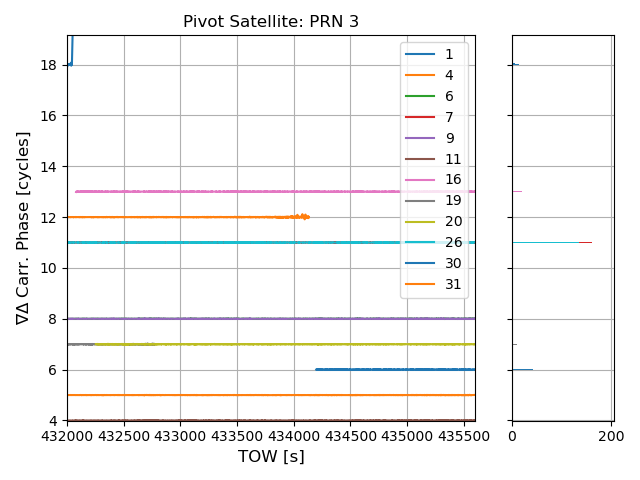

In [53]:
sats = sats[sats != pivsat]

# Open the figure for plotting
fig, ax = plt.subplots(1, 2, width_ratios = [4, 1], sharey=True)

for sat in sats :
    
    # First receiver
    d1_car_sat = df1_car[df1_car["PRN"].values == sat]
    d1_dop_sat = df1_dop[df1_dop["PRN"].values == sat]

    # Common TOWs
    tow1, ind1, ind2 = np.intersect1d(d1_car_sat["TOW"].values, d1_dop_sat["TOW"].values, return_indices = True)
    d1_car_sat = d1_car_sat.iloc[ind1]
    d1_dop_sat = d1_dop_sat.iloc[ind2]

    # Also get the corresponding clock bias
    tow1, ind1, ind2 = np.intersect1d(d1_car_sat["TOW"].values, dfclk1["TOW"].values, return_indices = True)

    # Propagate carrier phase observations using Doppler values
    # The clock bias is in nano-seconds
    carr1_sat = d1_car_sat.iloc[ind1]["VALUE"].values - dfclk1.iloc[ind2]["clk"].values * 1e-9 * d1_dop_sat.iloc[ind1]["VALUE"].values

    # Second receiver
    d2_car_sat = df2_car[df2_car["PRN"].values == sat]
    d2_dop_sat = df2_dop[df2_dop["PRN"].values == sat]

    # Common TOWs
    tow2, ind1, ind2 = np.intersect1d(d2_car_sat["TOW"].values, d2_dop_sat["TOW"].values, return_indices = True)
    d2_car_sat = d2_car_sat.iloc[ind1]
    d2_dop_sat = d2_dop_sat.iloc[ind2]

    # Also get the corresponding clock bias
    tow2, ind1, ind2 = np.intersect1d(d2_car_sat["TOW"].values, dfclk2["TOW"].values, return_indices = True)

    # Propagate carrier phase observations using Doppler values
    # The clock bias is in nano-seconds
    carr2_sat = d2_car_sat.iloc[ind1]["VALUE"].values - dfclk2.iloc[ind2]["clk"].values * 1e-9 * d2_dop_sat.iloc[ind1]["VALUE"].values
    
    # Now compute single differences
    tow_sat, ind1, ind2 = np.intersect1d(tow1, tow2, return_indices = True)

    sdiff_sat = carr1_sat[ind1] - carr2_sat[ind2]
    
    # Finally compute double differences
    tow, ind1, ind2 = np.intersect1d(tow_sat, tow_piv, return_indices = True)
    
    ddiff = sdiff_sat[ind1] - sdiff_piv[ind2]
    
    ax[0].plot(tow, ddiff, label = str(sat))
    
    hist, bins = np.histogram(ddiff, bins = 30)
    hist = hist / sum(hist) / np.mean(np.diff(bins))
    ax[1].barh((bins[1:] + bins[:-1]) / 2, hist, height = np.mean(np.diff(bins)))
    
# Finally some cosmetic for the figure
ax[0].grid(True)
ax[0].set_xlabel("TOW [s]", fontsize = 12)
ax[0].set_ylabel(r"$\nabla\Delta$ Carr. Phase [cycles]", fontsize = 12)
ax[0].legend()
ax[0].set_title(f"Pivot Satellite: PRN {pivsat}")
ax[0].autoscale(tight = True)

ax[1].grid(True)
ax[1].autoscale(tight = True)
fig.tight_layout()